In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Bio import Align
from Bio.Seq import Seq
from Bio.Align import substitution_matrices
import sys
import os
import seaborn as sns
import math

In [2]:
#Reads the first N lines of the R1 fastq NGS file. Each line of the file is added to a list (LON_R1_trim).
#Uncomment to load only N lines of fastq file (N/4 reads)
# N=100000

# with open("LON-Rep2_R1_001.fastq") as myfile:
#     LON_R1 = [next(myfile) for x in range(N)]
    
#__________________________________________________
#Reads the entire fastq NGS file 
#Uncomment to load all the lines of the file
LON_R1_file = open("LON-Rep2_R1_001.fastq", "r")
LON_R1 = LON_R1_file.readlines()
LON_R1_file.close()
#__________________________________________________

LON_R1_trim = LON_R1[1::4] #Isolates only every fourth line from the fastQ file, i.e. just the reads. The remaining lines of the file are removed.
LON_R1_trim = [i.strip('\n') for i in LON_R1_trim] #this just removes the '\n' from the end of every line


#Repeats the same process as above, for the R2 NGS file

# #Uncomment to load only N lines of fastq file (N/4 reads)
# with open("LON-Rep2_R2_001.fastq") as myfile:
#     LON_R2 = [next(myfile) for x in range(N)]

#__________________________________________________    
#Uncomment to load all the lines of the file
LON_R2_file = open("LON-Rep2_R2_001.fastq", "r")
LON_R2 = LON_R2_file.readlines()
LON_R2_file.close()
#__________________________________________________

LON_R2_trim = LON_R2[1::4]
LON_R2_trim = [i.strip('\n') for i in LON_R2_trim]

LON_data = pd.DataFrame({'Read 1':LON_R1_trim, 'Read 2':LON_R2_trim})
LON_data.to_csv('1_LON_data_raw_rep2.csv')
LON_data

,Read 1,Read 2
0,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,TGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGG...
1,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...
2,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...
3,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAGTGACAAGTACA...,TCTGTACTTGTCACTACTCTGACCTGTACTTGTCACTACTCTTCCT...
4,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAGTGACAAGTACA...,TCTGTACTTGTCACTACTCTGACCTGTACTTGTCACTACTCTTCCT...
...,...,...
226392,TCTGTACTTGTCACTACTCTGAACTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATAGTGAAAAAGGAAGTGTATAAAAAAGCCCG...
226393,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...
226394,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...
226395,GATCATAATATGGAAGTATACGTTGGAGCCCCAGCGAGGTCTCTAT...,CAACCTTGCTACATTGCTCTACTTTTTCTCAGGTCTTATTTACTCT...


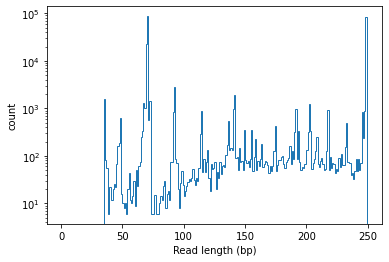

In [3]:
#Plots a histogram of the read lengths in both R1 and R2. Note the log scale y axis
readlengths = [len(i) for i in LON_data['Read 1']]+[len(i) for i in LON_data['Read 2']]
read_length_distribution=plt.hist(readlengths, bins = list(range(1, max(readlengths))), histtype='step')
plt.xlabel('Read length (bp)')
plt.ylabel('count')
plt.yscale('log')

In [4]:
#Here we set up the parameters of the alignment algorithm. I'm not going to claim to fully understand how the 
#alignment function from biopython works, but I do have some familiarity with one of the alignment algorithms it uses
# (the smith-waterman alignment). The biopython manual states that it uses the same algorithm as the EBI water local 
# alignment algorithm (https://www.ebi.ac.uk/Tools/psa/emboss_water/). I did my best to set the scoring for the 
# alignment algorithm used here to be the same as used by ebi (so you can check your work using their aligner tool
# online). I've gotten it so that they should give the same alignment, but for some reason the alignment *score* 
# given by this aligner isn't identical to the ebi score.
aligner = Align.PairwiseAligner()
aligner.mode = 'local'
matrix = substitution_matrices.load("Nuc.4.4")
aligner.substitution_matrix = matrix
aligner.open_gap_score = -10
aligner.extend_gap_score = -0.5

CAATGGCTTCAATAATATTGAAAAAGGAAGAG
|||.|...|.||.||||||||||||||||||
CAAAGTAATAAAAAATATTGAAAAAGGAAGACAAAAAAAAAGCCATCATAAACACTCCCATTCCTCACATCATATCTCACTCAAATCAAAACTTCATAAATAAAGACAAGATAATCAAAGAATGAAAAGAGATCAATCAAAAACTAAAAATAAAAACGTATAACCTAAAATAAAAATAATATTATAAAAATAATAAAAATCATCTGGAGAACCAACAATCGTCAAAGGCACAACCTCAGACTATCAAATC

TCTGTACTTGTCACTACTCTGACC
     |||||||||||||||
     ACTTGTCACTACTCTTCCTTTTTCAATATTATTGAAGCCATTG

TCTGTACTTGTCACTACTCTGACC
         |||||||||||||||
         GTCACTACTCTGACCTAAATAGCAATATTTACCTTTTGCTGCCGTTGACGAATCTTGGAGCTCCCGCTGCTTTTAAATATTTTGATACAACAATTGATCGTAAACGATATACGTCTACAAAAGAAGTTTTAGATGCCACTCTTATCCATCAATCCATCACTGGTCTTTATGAAACACGCATTGATTTGAGTCAGCTAGGAGGTGACCAAAGCCCGCCGAAAGGCGGGCTTTTTTTTACTCTTCCTTTTTC

TCTGTACTTGTCACTACTCTGACC
        ||||||||||||||||
        TGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTCAAAAAGTTATCAGGCATGCACCTGGTAGCTAGTCTTTAAACCAATAGATTGCATCGGTTTAAAAGGCAAGACCGTCAAATTGCGGGAAAGGGGTCAACAGCCGTTCAGTACCAAGTCTCAGGGGAAACTTTGAGATGGCCTTGCAAAGGGTATGGTAATAAGCTGACGGACATGGT

Text(0, 0.5, 'count')

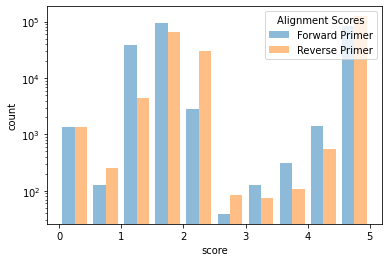

In [5]:
#Here I want to determine the direction of each read. While the ends of each read should match the primers I used, I 
# need to be able to account for, at the very least, one or two errors in the index. There are many ways of doing
# this, and the more robust the system is for accommodating errors, the more complicated it is. It is possible to use
#regexes, for example, but I don't know anything about those. What I've settled on for now is aligning each read to 
#both the forward and reverse primer and seeing which it aligns to better (above a certain 
#threshold)

fwd_prim = "TCTGTacttgtcactactctgacc"
fwd_prim = fwd_prim.upper()
rev_prim = "CAATGgcttcaataatattgaaaaaggaagag"
rev_prim = rev_prim.upper()

# The following code will generate histograms showing the distribution of different scores for aligning both the 
# forward and reverse primer to each of the first reads. As you can see, both sets of alignments separate nicely into
# two categories, with the higher scoring category corresponing to the correct alignment/direction. Manual inspection
# indicates that a normalized score greater than 3.0 indicates that the direction of a a given read can be confidently
# assigned
scores_R1_fwd=[]
scores_R1_rev=[]
norm_scores_R1_fwd=[] #The idea here is to normalize the score of an alignment to the length of the sequence being aligned. A long sequence with a perfect alignment will always have a better score than a short read with a perfect alignment
norm_scores_R1_rev=[]
count = 0
for i in LON_data.iloc[:,0]:
    scores_R1_fwd +=[aligner.score(i,fwd_prim)]
    scores_R1_rev +=[aligner.score(i,rev_prim)]
    norm_scores_R1_fwd +=[aligner.score(i,fwd_prim)/len(fwd_prim)]
    norm_scores_R1_rev +=[aligner.score(i,rev_prim)/len(rev_prim)]
    if count < 10: # A maximum of 10 alignments will be printed. Change 10 to a different number if you want to see more/fewer alignments
        if (3.0 < norm_scores_R1_fwd[-1] < 3.5): #print alignments with a given score, or in a given range
            alignment = aligner.align(fwd_prim,i)
            print(alignment[0])
            count += 1
        if (3.0 < norm_scores_R1_rev[-1] < 3.5): #print alignments with a given score, or in a given range
            alignment = aligner.align(rev_prim,i)
            print(alignment[0])
            count += 1
#Plot a histogram showing the distribution of 
plt.hist([norm_scores_R1_fwd, norm_scores_R1_rev], 
         label = ['Forward Primer','Reverse Primer'], 
         align = 'mid',
         alpha = 0.5
        )
plt.legend(title="Alignment Scores")
plt.yscale('log')
plt.xlabel('score')
plt.ylabel('count')

In [6]:
#This cell will add the orientation (forward or reverse) and alignment score information to the read dataframe

#First the reads in the R1 file will be analyze
norm_scores_r1 = []
direction_r1 = []
for i in LON_data.loc[:,'Read 1']:
    norm_fwd_score = aligner.score(i,fwd_prim)/len(fwd_prim)
    if norm_fwd_score >= 3:                                 #Set the minimum normalized alignment score to be considered a 'true positive' forward read
        norm_scores_r1 += [norm_fwd_score]
        direction_r1 += ['Forward']
    else:
        norm_rev_score = aligner.score(i,rev_prim)/len(rev_prim)
        if norm_rev_score >= 3:                             #Set the minimum normalized alignment score to be considered a 'true positive' reverse read
            norm_scores_r1 += [norm_rev_score]
            direction_r1 += ['Reverse']
        else:
            norm_scores_r1 += [np.nan]                     #No direction or score is assigned for any reads with a score below the minum for both reads
            direction_r1 += ['unassigned']

#Repeat the analysis for the reads in the R2 file
norm_scores_r2 = []
direction_r2 = []
for i in LON_data.loc[:,'Read 2']:
    norm_fwd_score = aligner.score(i,fwd_prim)/len(fwd_prim)
    if norm_fwd_score >= 3:                                 #Set the minimum normalized alignment score to be considered a 'true positive' forward read
        norm_scores_r2 += [norm_fwd_score]
        direction_r2 += ['Forward']
    else:
        norm_rev_score = aligner.score(i,rev_prim)/len(rev_prim)
        if norm_rev_score >= 3:                                 #Set the minimum normalized alignment score to be considered a 'true positive' reverse read
            norm_scores_r2 += [norm_rev_score]
            direction_r2 += ['Reverse']
        else:
            norm_scores_r2 += [np.nan]                     #No direction or score is assigned for any reads with a score below the minum for both reads
            direction_r2 += ['unassigned']

#Add the direction and normalized primer alignment score to the dataframe
LON_data['Read 1 Direction'] = direction_r1
LON_data['Read 1 Score'] = norm_scores_r1
LON_data['Read 2 Direction'] = direction_r2
LON_data['Read 2 score'] = norm_scores_r2

#Get rid of any reads where the orientation of either read cannot be determined
LON_data_2 = LON_data[LON_data['Read 1 Direction'] != 'unassigned'].copy()
LON_data_3 = LON_data_2[LON_data_2['Read 2 Direction'] != 'unassigned'].copy()

print('The orientation of ' + str(len(LON_data)-len(LON_data_3))+' paired reads (' + str(((len(LON_data)-len(LON_data_3))/len(LON_data))*100) + '%) could not be determined and were removed from the dataset')

#We also want to get rid of any reads where the direction of both reads was assigned to be the same (i.e. two
#forward reads or two reverse reads). If there are too many of these, you may want to increase the stringency of
#assigning forward and reverse reads by increasing the score threshold.
LON_data_4 = LON_data_3[~(LON_data_3['Read 1 Direction'] == LON_data_3['Read 2 Direction'])].copy()
LON_data_4.reset_index(inplace=True, drop=True)
print('The orientation of ' + str(len(LON_data_3)-len(LON_data_4)) + ' paired reads (' + str(((len(LON_data_3)-len(LON_data_4))/len(LON_data))*100)+ '%) were identical, and were removed from the dataset')
LON_data_4.to_csv('2_LON_data_dir_rep2.csv')
LON_data_4

The orientation of 20716 paired reads (9.150297927976077%) could not be determined and were removed from the dataset
The orientation of 421 paired reads (0.18595652769250476%) were identical, and were removed from the dataset


,Read 1,Read 2,Read 1 Direction,Read 1 Score,Read 2 Direction,Read 2 score
0,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,TGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGG...,Reverse,5.000,Forward,4.583333
1,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,Reverse,5.000,Forward,5.000000
2,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,Reverse,5.000,Forward,4.166667
3,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAGTGACAAGTACA...,TCTGTACTTGTCACTACTCTGACCTGTACTTGTCACTACTCTTCCT...,Reverse,5.000,Forward,5.000000
4,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAGTGACAAGTACA...,TCTGTACTTGTCACTACTCTGACCTGTACTTGTCACTACTCTTCCT...,Reverse,5.000,Forward,5.000000
...,...,...,...,...,...,...
205255,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,Reverse,5.000,Forward,5.000000
205256,TCTGTACTTGTCACTACTCTGAACTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATAGTGAAAAAGGAAGTGTATAAAAAAGCCCG...,Forward,4.625,Reverse,4.437500
205257,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,Forward,5.000,Reverse,5.000000
205258,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,Forward,5.000,Reverse,5.000000


In [7]:
###Make two columns containing all forward sequences in one column and all reverse sequences in the other###

LON_data_4['Forward_read'] = pd.Series(dtype=str)
LON_data_4['Reverse_read'] = pd.Series(dtype=str)

###untangle using for loops (accurate, but slow af. update, it's fast af)###

#create empty list for forward and reverse reads
forward = []
reverse = []

#design for loop to parse through each row and determine which read (1 or 2) is the forward sequence, feed into list
for i in range(len(LON_data_4)):
    if LON_data_4['Read 1 Direction'][i] == 'Forward':
        fr = LON_data_4['Read 1'][i]
    else:
        fr = LON_data_4['Read 2'][i]
    forward.append(fr)

#design for loop to parse through each row and determine which read (1 or 2) is the reverse sequence, feed into list
for i in range(len(LON_data_4)):
    if LON_data_4['Read 1 Direction'][i] == 'Reverse':
        rr = LON_data_4['Read 1'][i]
    else:
        rr = LON_data_4['Read 2'][i]
    reverse.append(rr)


#insert lists of forward and reverse reads into series of each.
LON_data_4['Forward_read'] = forward
LON_data_4['Reverse_read'] = reverse
LON_data_5= LON_data_4[['Read 1 Direction','Read 2 Direction','Forward_read','Reverse_read']].copy()
LON_data_5.to_csv('3_LON_data_fwd_rev_rep2.csv')
LON_data_5

,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read
0,Reverse,Forward,TGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...
3,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTGTACTTGTCACTACTCTTCCT...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAGTGACAAGTACA...
4,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTGTACTTGTCACTACTCTTCCT...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAGTGACAAGTACA...
...,...,...,...,...
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...
205256,Forward,Reverse,TCTGTACTTGTCACTACTCTGAACTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATAGTGAAAAAGGAAGTGTATAAAAAAGCCCG...
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...


In [8]:
#Here we define some sequences we want to align to

#ribo_rev is the reverse complement of the intron, plus the short region upstream of the ribozyme that is included in the barcode (including the index added by the primer). We want the rev comp because we will be using the reverse reads to
#align. We also want all the text to be in the same case (reduces complications with text handling algorithms), so
#we'll change it all to uppercase
ribo_rev='CGAGTACTCCAAAACTAATCAATATACTTTCGCATACAAATTAGTTCCCAGCGGCTCCAGTGTTGCATCACTTCATCCGCTAGCTCCCATTAAGGAGAGGTCCGACTATATCTTATGAGAAGAATACATCTTCCCCGACCGACATTTAGTCTGTGAACTGCATCCATATCAACAGAAGATCTGTTGACTTAGGACTTGGCTGCGTGGTTAGGACCATGTCCGTCAGCTTATTACCATACCCTTTGCAAGGCCATCTCAAAGTTTCCCCTGAGACTTGGTACTGAACGGCTGTTGACCCCTTTCCCGCAATTTGACGGTCTTGCCTTTTAAACCGATGCAATCTATTGGTTTAAAGACTAGCTACCAGGTGCATGCCTGATAACTTTTtgaccCAAAGGTAAATATTGCTATTTaggtcagagtagtgacaagtggtat'
ribo_rev=ribo_rev.upper()

#The next sequence we want is the portion of the inserted sequence that is (or should be) present in every reverse
#read, i.e. the sequence from the reverse primer (including the index) to the start of the intron. Since the great 
#majority of this sequence consists of the interaction sequence, this sequence will be called 'interact'
interact = 'ACGCCgcttcaataatattgaaaaaggaagagtAAAAAAAAGCCCGCCTTTCGGCGGGCTTTGgtcacctcctagctgactcaaatcaatgcgtgtttcataaagaccagtgatggattgatggataagagtggcatctaaaacttcttttgtagacgtatatcgtttacgatcaattgttgtatcaaaatatttAAAAGCAGCGGGAGCTCCAAGATTCGTCAACGGCAGCA'
interact = interact.upper()


In [9]:
###
#So what I intend to do in order to determine where an intron was split at a given read is to:
# 1. Align the reverse read to the inserted sequence in the intron (the variable saved here as 'interact')
# 2. Determine where that alignment ends
# 3. The rest of the read that doesn't get aligned (~17 nucleotides) should correspond to some part of the intron. 
# 4. I will take the unaligned part of the read and align it with the intron. The junction between the inserted 
#    sequence and the intron lies where that portion of the read begins.
###

ACGCCGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCGCCTTTCGGCGGGCTTTGGTCACCTCCTAGCTGACTCAAATCAATGCGTGTTTCATAAAGACCAGTGATGGATTGATGGATAAGAGTGGCATCTAAAACTTCTTTTGTAGACGTATATCGTTTACGATCAATTGTTGTATCAAAATATTTAAAAGCAGCGGGAGCTCCAAGATTCGTCAACGGCAGCA
     |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||||||||||||||.|.|||||||||||||||||.|||.|||||||||||||||.||||||.||||||||||||||||.|.|||||||||||||||||||||.|||.||.||||.||
CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCGCCTTTCGGCGGGCTTTGGTCACCTCCTATCTGACTCAAATCAATGCGTGTTTCATAAAGACCAGTGATGGATTGATGGATAAGGGGGGCATCTAAAACTTCTTGTGTCGACGTATATCGTTTAGGATCAAGTGTTGTATCAAAATATGTTAAAGCAGCGGGAGCTCCAAGAGTCGACACCGGCCGCCCCTGAGACTTGGTACTG

ACGCCGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCGCCTTTCGGCGGGCTTTGGTCACCTCCTAGCTGACTCAAATCAATGCGTGTTTCATAAAGACCAGTGATGGATTGATGGATAAGAGTGGCATCTAAAACTTCTTTTGTAGACGTATATCGTTTACGATCAATTGTTGTATCAAAATATTTAAAAGCAGCGGGAGCTCCAAGATTCGTCAACGGCAGCA
     ||||||||||||||||||||||||||||||||||||||||||

,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read,Reverse Read inserted sequence alignment score
0,Reverse,Forward,TGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
3,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTGTACTTGTCACTACTCTTCCT...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAGTGACAAGTACA...,153.5
4,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTGTACTTGTCACTACTCTTCCT...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAGTGACAAGTACA...,153.5
...,...,...,...,...,...
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
205256,Forward,Reverse,TCTGTACTTGTCACTACTCTGAACTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATAGTGAAAAAGGAAGTGTATAAAAAAGCCCG...,973.0
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0


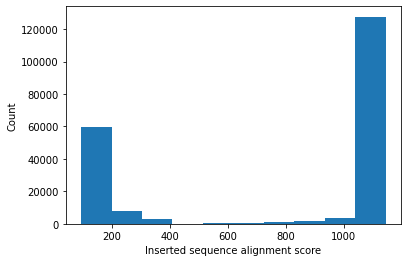

In [10]:
# First, I want to get an idea of what a typical score is for aligning a reverse read to the inserted sequence. This
# cell aligns each reverse read to the inserted sequence and produces a histogram of the resulting scores. It will
# also print out alignments with scores above and/or below a certain threshold score. This is useful if you want to 
# get an idea of what an alignment with a given score actually looks like.

#Note that this cell takes a few (~3) minutes to run

scores=[]
count = 0
for i in LON_data_5.loc[:,'Reverse_read']:
    scores += [aligner.score(interact,i)]
    if count < 10:     # A maximum of 10 alignments will be printed. Change 10 to a different number if you want to see more/fewer alignments
            if (1000 < scores[-1] < 1025): #print alignments with a given score, or in a given range
                alignment = aligner.align(interact,i)
                print(alignment[0])
                count += 1
        
LON_data_5['Reverse Read inserted sequence alignment score']=scores
scores_distribution = plt.hist(scores)
plt.xlabel('Inserted sequence alignment score')
plt.ylabel('Count')
LON_data_5.to_csv('4_LON_data_interact_align_rep2.csv')
LON_data_5
# As you can see, the vast majority of scores are >1000. Manual inspection reveals that a score of >1000 should be
# good enough quality to use for the next steps. While a score of 1000 includes some alignments with gaps, any gaps
# that prove to be a problem will be removed in the next steps


In [11]:
#Remove reads rows from dataframe containing reverse reads with interact alignment scores ≤ 1000
LON_data_6 = LON_data_5[(LON_data_5['Reverse Read inserted sequence alignment score'] > 1000)]

print(str(len(LON_data_5)-len(LON_data_6)) + ' reads were insufficient quality to align to the inserted sequence(' + str((len(LON_data)-len(LON_data_6))/len(LON_data)*100) + '%) and were removed from the dataset')
LON_data_6.to_csv('5_LON_data_interact_align_qc_rep2.csv')
LON_data_6

75847 reads were insufficient quality to align to the inserted sequence(42.83802347204247%) and were removed from the dataset


,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read,Reverse Read inserted sequence alignment score
0,Reverse,Forward,TGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
6,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0
7,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
...,...,...,...,...,...
205253,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0


In [12]:
# Many pairwise alignments result in multiple alignments with equivalent scores. This isn't a problem, as long as all
# the alignments agree on where the alignment ends. This cell identifies all the reads where the equivalent alignments
# *do not* end at the same point.
bad_reads = []
for i in range(len(LON_data_6)):
    alignment = aligner.align(interact, LON_data_6.iloc[i,3])
    al_end = []
    for jj in alignment:
        al_indices = jj.aligned
        al_end += [al_indices[-1][-1][-1]]
    if not(all(x == al_end[0] for x in al_end)):
        bad_reads += [LON_data_6.index[i]]
        
#Remove rows of the dataframe corresponding to reads  where the equivalent alignments
# *do not* end at the same point.
LON_data_7 = LON_data_6.loc[~LON_data_6.index.isin(bad_reads)].copy()
print(str(len(LON_data_6)-len(LON_data_7))+ ' reads (' + str(((len(LON_data_6)-len(LON_data_7))/len(LON_data))*100)+ '% ) had ambiguous endings, and were removed from the dataset')
LON_data_7.to_csv('6_LON_data_interact_align_qc2_rep2.csv')
LON_data_7

4 reads (0.0017668078640618028% ) had ambiguous endings, and were removed from the dataset


,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read,Reverse Read inserted sequence alignment score
0,Reverse,Forward,TGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
6,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0
7,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
...,...,...,...,...,...
205253,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0


In [13]:
# This cell aligns each reverse read to the inserted sequence. It then determines where in the reverse read the
# inserted sequence ends, and therefore where the ribozyme sequence begins. The end position of the inserted sequence 
# as well as the portion of the read following the end of the inserted sequence, which should correspond to the 
# ribozyme sequence immediately following the split site, are then added to the dataframe

end_insert = []
rev_read_ribo = []
for i in LON_data_7.loc[:,'Reverse_read']:
    alignment = aligner.align(interact, i)
    al_indices = alignment[0].aligned
    end_insert += [al_indices[-1][-1][-1]]
    rev_read_ribo += [i[end_insert[-1]:]]

LON_data_7['Reverse read inserted sequence end position'] = end_insert
LON_data_7['Reverse read ribozyme sequence'] = rev_read_ribo
LON_data_7.to_csv('7_LON_data_end_insert_rep2.csv')
LON_data_7

,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read,Reverse Read inserted sequence alignment score,Reverse read inserted sequence end position,Reverse read ribozyme sequence
0,Reverse,Forward,TGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTCCTG
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CCTGAGACTTGGTACTG
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG
6,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,CATAAAAATTAGTTCCC
7,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCCAAAGGTAAATATTG
...,...,...,...,...,...,...,...
205253,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CGCATACAAATTAGTTC
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,TCCGCTAGCTCCCATT
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,CCTGAGACTTGGTACTG


In [14]:
#The minimum length for which all subsequences of the ribozyme of the that length are unique is 9. That is,
#chunks of the ribozyme less than 9 nucleotides long are not necessarily unique, and may align perfectly to two
#separate sites in the ribozyme. Consequently, any reads for which the sequence following the interaction sequence, 
#correspoing to the ribozyme sequence just prior to the split site, less than nine nucleotides long must be removed
#because the split site cannot be determined unequivocally.

#This function was used to determine the smallest n such that all substrings of length n for a given string are unique
#in that string. The output is 9 for ribozyme
def min_unique_length(input_seq):
    min_length = 1
    count = 2
    while count > 1:
        for i in range(len(input_seq)):
            if i+min_length <= len(input_seq):
                count = input_seq.count(input_seq[i:i+min_length])
            if count > 1:
                min_length += 1
                break
    return min_length

In [15]:
#Remove any entries from the dataframe where the sequence after the interaction sequence is less than the minimum 
#unique sequence length
min_ribo = min_unique_length(ribo_rev)

LON_data_8 = LON_data_7[(LON_data_7['Reverse read ribozyme sequence'].str.len() >= min_ribo)].copy()
print(str(len(LON_data_7)-len(LON_data_8)) + ' reads (' + str(((len(LON_data_7)-len(LON_data_8))/len(LON_data))*100) + '%) were too short to determine insertion site, and were removed from the dataset')
LON_data_8.to_csv('8_LON_data_end_insert_qc1_rep2.csv')
LON_data_8

27 reads (0.01192595308241717%) were too short to determine insertion site, and were removed from the dataset


,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read,Reverse Read inserted sequence alignment score,Reverse read inserted sequence end position,Reverse read ribozyme sequence
0,Reverse,Forward,TGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTCCTG
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CCTGAGACTTGGTACTG
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG
6,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,CATAAAAATTAGTTCCC
7,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCCAAAGGTAAATATTG
...,...,...,...,...,...,...,...
205253,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CGCATACAAATTAGTTC
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,TCCGCTAGCTCCCATT
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,CCTGAGACTTGGTACTG


CGAGTACTCCAAAACTAATCAATATACTTTCGCATACAAATTAGTTCCCAGCGGCTCCAGTGTTGCATCACTTCATCCGCTAGCTCCCATTAAGGAGAGGTCCGACTATATCTTATGAGAAGAATACATCTTCCCCGACCGACATTTAGTCTGTGAACTGCATCCATATCAACAGAAGATCTGTTGACTTAGGACTTGGCTGCGTGGTTAGGACCATGTCCGTCAGCTTATTACCATACCCTTTGCAAGGCCATCTCAAAGTTTCCCCTGAGACTTGGTACTGAACGGCTGTTGACCCCTTTCCCGCAATTTGACGGTCTTGCCTTTTAAACCGATGCAATCTATTGGTTTAAAGACTAGCTACCAGGTGCATGCCTGATAACTTTTTGACCCAAAGGTAAATATTGCTATTTAGGTCAGAGTAGTGACAAGTGGTAT
                                                                                                                                                                                                                                                                          |||||||||||||.|||
                                                                                                                                                                                                                                                                          CCTGAGACTTG

,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read,Reverse Read inserted sequence alignment score,Reverse read inserted sequence end position,Reverse read ribozyme sequence,Reverse Read ribozyme alignment normalized score
0,Reverse,Forward,TGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTCCTG,4.470588
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CCTGAGACTTGGTACTG,5.000000
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.000000
6,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,CATAAAAATTAGTTCCC,4.470588
7,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCCAAAGGTAAATATTG,5.000000
...,...,...,...,...,...,...,...,...
205253,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CGCATACAAATTAGTTC,5.000000
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.000000
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,TCCGCTAGCTCCCATT,5.000000
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,CCTGAGACTTGGTACTG,5.000000


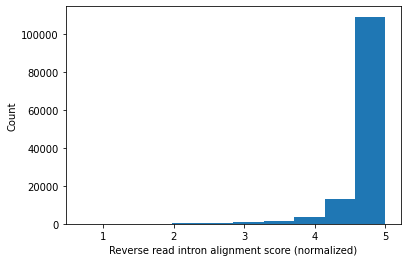

In [16]:
#I want to get an idea of what a typical score is for aligning the portion of a reverse read following the interaction
#sequence to the WT intron. This cell performs each alignment and produces a histogram of the resulting scores. 
#Because a shorter sequence with a perfect alignment will always have a lower score than a longer sequence with a 
#perfect alignment, it is important to normalize here, unlike in previous alignments, because not all the sequences 
#are the same length. 

#This cell will also print out alignments with scores above and/or below a certain threshold score if you uncomment 
#the commented lines. This is useful if you want to get an idea of what an alignment with a given score actually 
#looks like. If you do so, I recommend running this code on a subset of a subset of the dataframe, rather than 
#the whole thing, to save on time

ribo_score = []
ribo_score_norm = []
count = 0
for i in LON_data_8.loc[:,'Reverse read ribozyme sequence']:
    ribo_score += [aligner.score(ribo_rev,i)]
    ribo_score_norm += [ribo_score[-1]/len(i)]
    if count < 10:     # A maximum of 10 alignments will be printed. Change 10 to a different number if you want to see more/fewer alignments
            if (4 < ribo_score_norm[-1]<5): #print alignments with a given score, or in a given range
                alignment = aligner.align(ribo_rev,i)
                print(alignment[0])
                count += 1
# LON_data_8['Reverse Read ribozyme alignment score']=ribo_score
LON_data_8['Reverse Read ribozyme alignment normalized score']=ribo_score_norm
plt.hist(ribo_score_norm)
plt.xlabel('Reverse read intron alignment score (normalized)')
plt.ylabel('Count')
LON_data_8.to_csv('9_LON_data_ribo_score_rep2.csv')
LON_data_8

#As you can see, the vast majority of normalized scores are >4. I have chosen to set a threshold normlazied score of 
#4.5, because a 9 nt sequence with a single mismatch has a score of 4, and if a 9 nucleotide read has even a single 
#mismatch, it might not be able to be aligned to a unique place

In [17]:
#Remove reads rows from dataframe containing reverse reads with normalized ribozyme alignment scores ≤ 4.5
LON_data_9 = LON_data_8[(LON_data_8['Reverse Read ribozyme alignment normalized score'] > 4.5)].copy()

print(str(len(LON_data_8)-len(LON_data_9)) + ' reads (' + str((len(LON_data_8)-len(LON_data_9))/len(LON_data)*100) + '%) were insufficient quality to align to the intron, and were removed from the dataset')
LON_data_9.to_csv('10_LON_data_ribo_score_qc1_rep2.csv')
LON_data_9

19953 reads (8.813279327906288%) were insufficient quality to align to the intron, and were removed from the dataset


,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read,Reverse Read inserted sequence alignment score,Reverse read inserted sequence end position,Reverse read ribozyme sequence,Reverse Read ribozyme alignment normalized score
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CCTGAGACTTGGTACTG,5.0
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.0
7,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCCAAAGGTAAATATTG,5.0
8,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAATGCCCG...,1131.0,233,CCTGAGACTTGGTACTG,5.0
14,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.0
...,...,...,...,...,...,...,...,...
205253,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CGCATACAAATTAGTTC,5.0
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.0
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,TCCGCTAGCTCCCATT,5.0
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,CCTGAGACTTGGTACTG,5.0


In [18]:
# Many pairwise alignments result in multiple alignments with equivalent scores. This isn't a problem, as long as all
# the alignments agree on where the alignment ends. This cell identifies all the reads where the equivalent alignments
# *do not* end at the same point. This has the added benefit of identifying reads that are too short to align to one 
# unique place in the ribozyme
# Similarly, if the first base pair(s) of the ribozyme part of the read doesn't align the to the ribozyme, it
# becomes very difficult to determine where exactly the split site should be assigned. For example, it is difficult to
# tell whether the last, mismatched nucleotide is just a miscalled base, in which case the split site should be after
# that base, or it's an incorrectly inserted base, in which the split site should be added before that base. I've
# opted to just removed those reads.

ambiguous_reads = []
bad_end_reads = []
for i in range(len(LON_data_9)):
    alignment = aligner.align(ribo_rev, LON_data_9.iloc[i,6])
    al_start = []
    al_first = []
    for jj in alignment:
        al_indices = jj.aligned
        al_start += [al_indices[0][0][0]]     #The position where the ribozyme read aligns to the ribozyme sequence
        al_first += [al_indices[1][0][0]]     #The number of the first nucleotide in the read that aligns to the ribozyme (this should be zero!)
    if not(all(x == al_start[0] for x in al_start)):
        ambiguous_reads += [LON_data_9.index[i]]      # A list of the indices of all the reads that don't align to exactly one site in the ribozyme 
    if any(x != 0 for x in al_first):
        bad_end_reads += [LON_data_9.index[i]]

#Remove rows of the dataframe corresponding to reads  where the equivalent alignments
# *do not* end at the same point.

LON_data_9_5 = LON_data_9.loc[~LON_data_9.index.isin(ambiguous_reads)].copy()
print(str(len(LON_data_9)-len(LON_data_9_5)) + ' reads (' + str((len(LON_data_9)-len(LON_data_9_5))/len(LON_data)*100) + '%) had ambigous alignment ends, and were removed from the dataset')
LON_data_10 = LON_data_9_5.loc[~LON_data_9_5.index.isin(bad_end_reads)].copy()
print(str(len(LON_data_9_5)-len(LON_data_10)) + ' reads (' + str((len(LON_data_9_5)-len(LON_data_10))/len(LON_data)*100) + '%) had mismatched alignment ends, and were removed from the dataset')
LON_data_10.to_csv('10_LON_data_ribo_score_qc1_rep2.csv')
LON_data_10

0 reads (0.0%) had ambigous alignment ends, and were removed from the dataset
1771 reads (0.7822541818133633%) had mismatched alignment ends, and were removed from the dataset


,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read,Reverse Read inserted sequence alignment score,Reverse read inserted sequence end position,Reverse read ribozyme sequence,Reverse Read ribozyme alignment normalized score
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CCTGAGACTTGGTACTG,5.0
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.0
7,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCCAAAGGTAAATATTG,5.0
8,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAATGCCCG...,1131.0,233,CCTGAGACTTGGTACTG,5.0
14,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.0
...,...,...,...,...,...,...,...,...
205253,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CGCATACAAATTAGTTC,5.0
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.0
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,TCCGCTAGCTCCCATT,5.0
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,CCTGAGACTTGGTACTG,5.0


In [19]:
# This cell aligns the part of each reverse read after the interaction sequence to to the intron. It then determines 
#where in the intron the reverse read starts, and therefore where the ribozyme was split.
split_site=[]
for i in LON_data_10.loc[:,'Reverse read ribozyme sequence']:
    alignment = aligner.align(ribo_rev, i)
    al_indices = alignment[0].aligned
    split_site += [len(ribo_rev) - al_indices[0][0][0]-19] #Subtract 14 from the index so that position 0 is the position immediately after the last nucleotide in the 5' sfGFP exon and immediately before IGS, as annotated in  


#Add list of split sites to dataframe
LON_data_10['Split Site'] = split_site
#Save results so far as a csv so you don't have to redo all your work
LON_data_10.to_csv('11_LON_All_Processed_Reads_rep2.csv')
LON_data_10

,Read 1 Direction,Read 2 Direction,Forward_read,Reverse_read,Reverse Read inserted sequence alignment score,Reverse read inserted sequence end position,Reverse read ribozyme sequence,Reverse Read ribozyme alignment normalized score,Split Site
1,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CCTGAGACTTGGTACTG,5.0,153
2,Reverse,Forward,TACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTGGGTC...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.0,153
7,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCCAAAGGTAAATATTG,5.0,29
8,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAATGCCCG...,1131.0,233,CCTGAGACTTGGTACTG,5.0,153
14,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.0,153
...,...,...,...,...,...,...,...,...,...
205253,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1131.0,233,CGCATACAAATTAGTTC,5.0,389
205255,Reverse,Forward,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1140.0,233,CCTGAGACTTGGTACTG,5.0,153
205257,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,TCCGCTAGCTCCCATT,5.0,344
205258,Forward,Reverse,TCTGTACTTGTCACTACTCTGACCTAAATAGCAATATTTACCTTTG...,CAATGGCTTCAATAATATTGAAAAAGGAAGAGTAAAAAAAAGCCCG...,1122.0,233,CCTGAGACTTGGTACTG,5.0,153


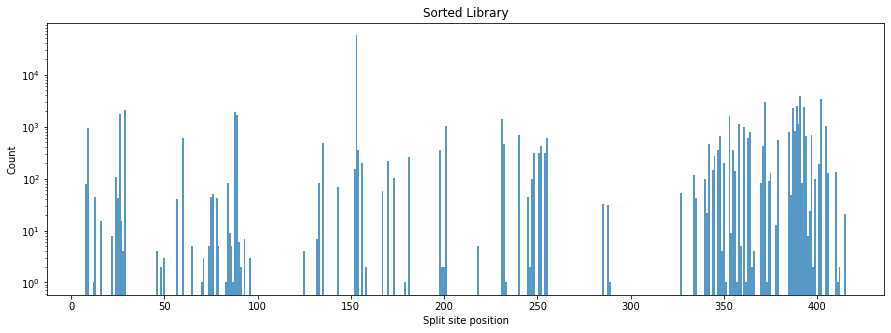

In [20]:
#Plot a histogram of the split sites
fig, axes = plt.subplots(figsize = [15,5])

sns.histplot(LON_data_10['Split Site'], stat = 'count', discrete = True, ax = axes)
plt.setp(axes.patches, linewidth=0)
plt.yscale('log')
plt.xlabel('Split site position')
plt.ylabel('Count')
plt.title('Sorted Library')
plt.savefig(r'sorted_Libary_Coverage_hist_rep2.png', dpi = 300)

In [21]:
missing_coverage = []
for i in list(range(420)):
    if i not in LON_data_10['Split Site'].values:
        missing_coverage += [i]
print('Site not represented in the intron', missing_coverage)
print()
print(100 - ((len(missing_coverage)/420)*100), '% coverage in intial library')

Site not represented in the intron [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 14, 15, 17, 18, 19, 20, 21, 23, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 49, 51, 52, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 66, 67, 68, 69, 72, 73, 77, 80, 81, 82, 92, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 134, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 155, 157, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 171, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 234, 235, 236, 237, 238, 239, 241, 242, 243, 244, 249, 250, 253, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 2

In [22]:
# Create a raw count of the numeber of times each split site appears in the NGS data. The index of the resulting
# dataframe is the position of the split and the 'Count' column is how many times that split site appears

LON_site_counts = LON_data_10.groupby(by=["Split Site"]).count()
LON_site_counts = LON_site_counts.iloc[:,0].copy()
LON_site_counts = LON_site_counts.reset_index()
LON_site_counts.columns = ["Split Site", "Count"]
LON_site_counts.set_index('Split Site', inplace=True)
initial = pd.DataFrame(data=[0]*(len(ribo_rev)-18))
LON_site_counts = pd.concat([LON_site_counts,initial], axis=1)
LON_site_counts.drop([0], axis = 1, inplace = True)
LON_site_counts.to_csv('12_LON_site_counts_rep2.csv')
LON_site_counts

,Count
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
415,21.0
416,NaN
417,NaN
418,NaN


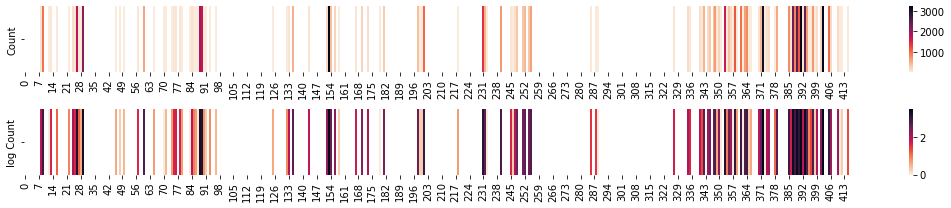

In [23]:
# Create a heatmap of the abundance of eahc site. This presents essentially the same data as the barchart above, just
# in a different way

LON_site_counts['log Count'] = np.log10(LON_site_counts['Count'])
LON_site_counts.replace(-np.inf,np.nan, inplace=True)


fig, axes = plt.subplots(2, figsize = [15,3])
sns.heatmap(LON_site_counts.transpose().iloc[[0],:],
            cmap = "rocket_r",
            robust = True, 
            ax=axes[0], 
            #square = True #forces heatmap grid to be sqaure
           )

sns.heatmap(LON_site_counts.transpose().iloc[[1],:], 
            cmap = "rocket_r", ax=axes[1], 
            robust = True, 
            #square = True #forces heatmap grid to be sqaure
           )

fig.tight_layout()
plt.savefig('Unsorted_library_heatmap_rep2.png', dpi = 300)